<a href="https://colab.research.google.com/github/PyHloni/PyHloniRep/blob/main/Means_PCA_linear_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
read_file = pd.read_csv ('channel_11_segment_1.txt')
read_file.to_csv ('channel_11_segment_1.csv', index=None)
headerList = ['Data']
read_file.to_csv("channel_11_segment_1.csv", header = headerList, index=False)
df = pd.read_csv("channel_11_segment_1.csv")
df['Data'].str.split('\t')
df['Data'].str.split('\t', expand=True)

,0,1,2,3,4
0,2015.03.19.00.15.00,14.72,-10.74,-91.06,8.72
1,2015.03.19.00.30.00,14.72,-10.74,-91.06,8.72
2,2015.03.19.00.45.00,14.7,-10.74,-91.17,8.76
3,2015.03.19.01.00.00,14.56,-10.74,-92.30,9.10
4,2015.03.19.01.15.00,14.55,-10.74,-94.09,8.81
...,...,...,...,...,...
32231,2016.03.31.11.45.00,14.8,-10.38,-97.99,9.73
32232,2016.03.31.12.00.00,14.8,-10.38,-98.45,9.68
32233,2016.03.31.12.15.00,14.8,-10.38,-97.97,9.71
32234,2016.03.31.12.30.00,14.8,-10.38,-97.88,9.81


In [3]:
dataset_cols = ['Date', 'Q_Factor','TX_Power','Chromatic_Dispersion','Polarization_Mode_Dispersion']
df = pd.read_csv("channel_11_segment_1.csv")
df[dataset_cols] = df['Data'].str.split('\t', expand=True)
#df[['Date', 'Q_Factor','TX_Power','Chromatic_Dispersion','Polarization_Mode_Dispersion']] = df['Data'].str.split('\t', expand=True)
df['Q_Factor'] = df['Q_Factor'].astype(float)
df['TX_Power'] = df['TX_Power'].astype(float)
df['Chromatic_Dispersion'] = df['Chromatic_Dispersion'].astype(float)
df['Polarization_Mode_Dispersion'] = df['Polarization_Mode_Dispersion'].astype(float)

df.dtypes

Data                             object
Date                             object
Q_Factor                        float64
TX_Power                        float64
Chromatic_Dispersion            float64
Polarization_Mode_Dispersion    float64
dtype: object

In [4]:
#drop column
df.drop(['Data'], axis=1)

,Date,Q_Factor,TX_Power,Chromatic_Dispersion,Polarization_Mode_Dispersion
0,2015.03.19.00.15.00,14.72,-10.74,-91.06,8.72
1,2015.03.19.00.30.00,14.72,-10.74,-91.06,8.72
2,2015.03.19.00.45.00,14.70,-10.74,-91.17,8.76
3,2015.03.19.01.00.00,14.56,-10.74,-92.30,9.10
4,2015.03.19.01.15.00,14.55,-10.74,-94.09,8.81
...,...,...,...,...,...
32231,2016.03.31.11.45.00,14.80,-10.38,-97.99,9.73
32232,2016.03.31.12.00.00,14.80,-10.38,-98.45,9.68
32233,2016.03.31.12.15.00,14.80,-10.38,-97.97,9.71
32234,2016.03.31.12.30.00,14.80,-10.38,-97.88,9.81


In [16]:
#df = df.drop(['Date'], axis=1)
df = df.drop(['Data'], axis=1)

In [37]:

df.drop(df[(df['Q_Factor'] <6.5)].index, inplace=True)
df.drop(df[(df['TX_Power'] < -12)].index, inplace=True)
len(df)

32235

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["Q_Factor"])
  plt.title(label)
  plt.ylabel("Q Factor")
  plt.xlabel(label)
  plt.show()

KeyboardInterrupt: ignored

# New section

In [38]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [39]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) ==1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X= dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [40]:
_,X_train_temp, y_train_temp = get_xy(train, "Q_Factor", x_labels=["TX_Power"])
_, X_val_temp, y_val_temp = get_xy(val, "Q_Factor", x_labels=["TX_Power"])
_, X_test_temp, y_test_temp = get_xy(test, "Q_Factor", x_labels=["TX_Power"])

In [41]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [42]:
y_train_temp

array([[14.79],
       [14.52],
       [14.82],
       ...,
       [14.45],
       [14.4 ],
       [14.42]])

In [43]:
temp_reg.score(X_test_temp, y_test_temp)

0.6644383931935411

In [44]:
print(temp_reg.coef_, temp_reg.intercept_)

[[0.82690179]] [23.39034991]


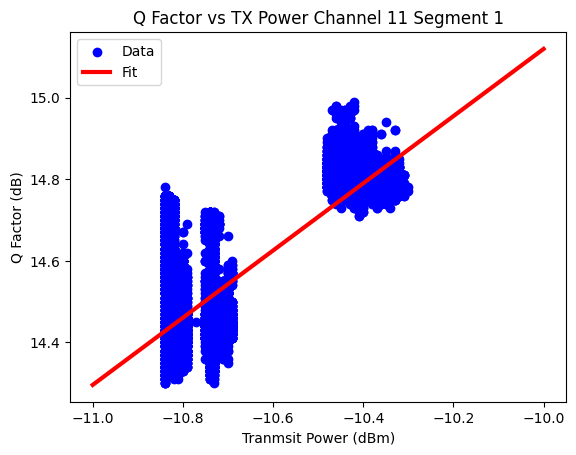

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-11, -10, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Q Factor vs TX Power Channel 11 Segment 1")
plt.ylabel("Q Factor (dB)")
plt.xlabel("Tranmsit Power (dBm)")
plt.show()

In [23]:
df

,Q_Factor,TX_Power,Chromatic_Dispersion,Polarization_Mode_Dispersion
0,14.72,-10.74,-91.06,8.72
1,14.72,-10.74,-91.06,8.72
2,14.70,-10.74,-91.17,8.76
3,14.56,-10.74,-92.30,9.10
4,14.55,-10.74,-94.09,8.81
...,...,...,...,...
32231,14.80,-10.38,-97.99,9.73
32232,14.80,-10.38,-98.45,9.68
32233,14.80,-10.38,-97.97,9.71
32234,14.80,-10.38,-97.88,9.81


Multiple Linear Regression

In [45]:
df.columns[1:]

Index(['TX_Power', 'Chromatic_Dispersion', 'Polarization_Mode_Dispersion'], dtype='object')

In [46]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [47]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_,X_train_all, y_train_all = get_xy(train, "Q_Factor", x_labels=df.columns[3:])
_, X_val_all, y_val_all = get_xy(val, "Q_Factor", x_labels=df.columns[3:])
_, X_test_all, y_test_all = get_xy(test, "Q_Factor", x_labels=df.columns[3:])

In [48]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)


LinearRegression()

In [49]:
y_test_all

array([[14.85],
       [14.41],
       [14.4 ],
       ...,
       [14.57],
       [14.82],
       [14.45]])

In [50]:
all_reg.score(X_test_all , y_test_all)

0.35307311199555125

In [51]:
all_reg.score(X_train_all, y_train_all)

0.342875872387596

In [52]:
y_train_pred = all_reg.predict(X_train_all)


In [53]:
y_train_pred, y_train_all

(array([[14.54155539],
        [14.63445412],
        [14.70822663],
        ...,
        [14.63445412],
        [14.68636811],
        [14.74374674]]),
 array([[14.43],
        [14.67],
        [14.77],
        ...,
        [14.5 ],
        [14.49],
        [14.72]]))

In [35]:
y_test_pred = all_reg.predict(X_test_all)


In [54]:
all_reg.score(X_test_all, y_test_all)

0.35307311199555125

In [55]:
from sklearn.metrics import mean_absolute_error

In [56]:
mae_train = mean_absolute_error(y_train_all, y_train_pred)
print("Training data MAE", mae_train)

Training data MAE 0.11979504049603389


In [57]:
len(y_train_pred)

19341

In [58]:
y_train_all

array([[14.43],
       [14.67],
       [14.77],
       ...,
       [14.5 ],
       [14.49],
       [14.72]])

ValueError: ignored

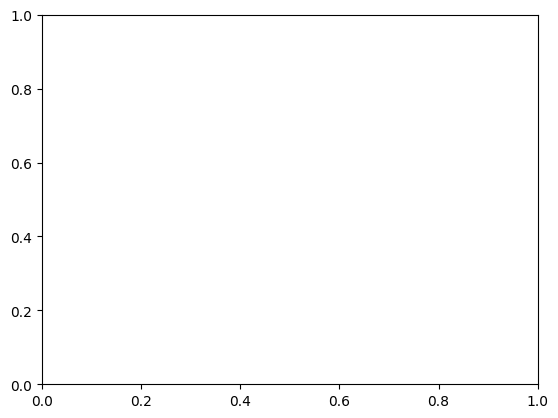

In [ ]:
plt.scatter(X_train_all,y_train_all, label="Data", color="blue")
x = tf.linspace(-100, 100, 100)
plt.plot(x, all_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="blue", linewidth=3)
plt.legend()
plt.title("Q Factor multiple vectors")
plt.ylabel("Q Factor range")
plt.xlabel("All Features")
plt.show()

In [ ]:
#Regression with Neural Net


#Regression with Neural Net

In [81]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.title('Regression with NN')
  plt.grid(True)
  plt.show

In [82]:
#only for TX power normailizer
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)   #Normalizer for TX Power
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [83]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
  ])

In [84]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
#temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_absolute_error')

In [89]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=50,
    batch_size = 32,
    validation_data=(X_val_temp, y_val_temp)
    )

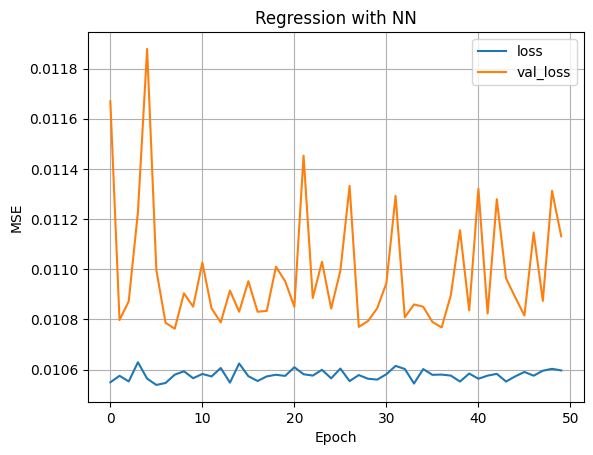

In [90]:
plot_loss(history)

4/4 [==============================] - 0s 5ms/step


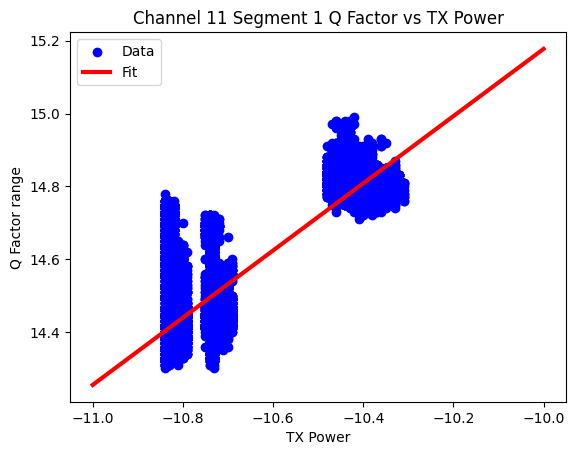

In [91]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-11, -10, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Channel 11 Segment 1 Q Factor vs TX Power")
plt.ylabel("Q Factor range")
plt.xlabel("TX Power")
plt.show()

Neural Net


In [107]:
#only for TX power normailizer
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)   #Normalizer for TX Power
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu'),
    #tf.keras.layers.Dense(1)
  ])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [108]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=20
)

In [109]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [110]:
y_pred_nn = nn_model.predict(X_test_temp)

202/202 [==============================] - 0s 1ms/step


In [111]:
MSE(y_pred_nn, y_test_temp)

212.7462826586009

In [113]:
mae_train = mean_absolute_error(y_test_temp, y_pred_nn)
print("Mean Absolute Error:", mae_train)

Mean Absolute Error: 14.584763455870949


In [101]:
X_test_temp

array([[-10.7 ],
       [-10.81],
       [-10.74],
       ...,
       [-10.73],
       [-10.7 ],
       [-10.47]])

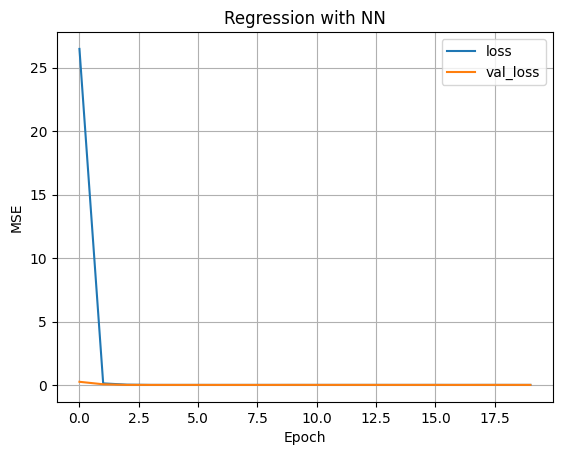

In [94]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


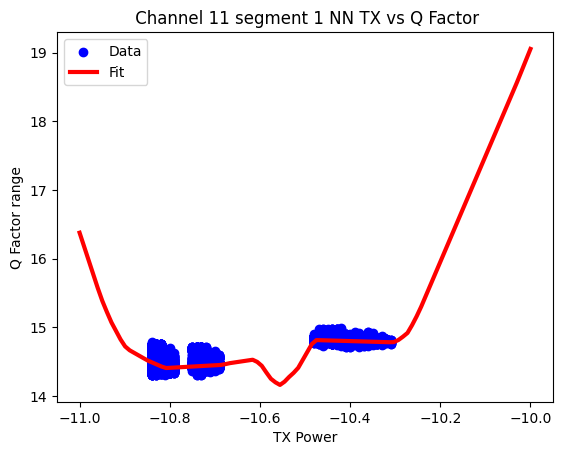

In [96]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-10, -11, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title(" Channel 11 segment 1 NN TX vs Q Factor")
plt.ylabel("Q Factor range")
plt.xlabel("TX Power")
plt.show()

Neural Network with multpuile inputs


In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(3,), axis=-1)   #Normalizer for TX Power
all_normalizer.adapt(X_train_all)



In [ ]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    #tf.keras.layers.Dense(1, activation = 'relu'),
    tf.keras.layers.Dense(1)
  ])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

NameError: ignored

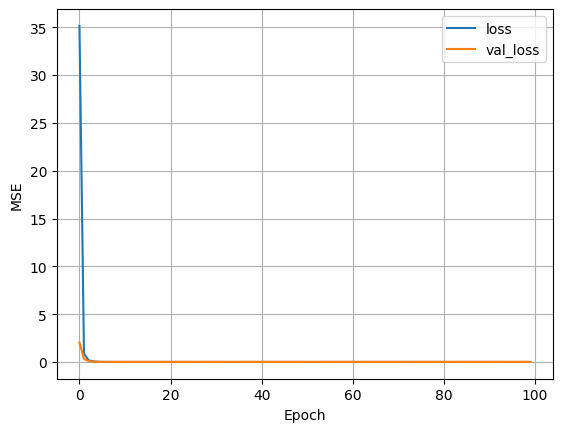

In [ ]:
plot_loss(history)

In [ ]:
X_test_all

array([[ -10.81,  -97.69,    9.53],
       [ -10.84,  -99.12,    9.31],
       [ -10.7 , -100.17,    9.34],
       ...,
       [ -10.73, -100.15,    9.51],
       [ -10.74,  -95.61,    9.06],
       [ -10.81, -102.33,    9.05]])

In [ ]:
all_reg.score(X_test_all , y_test_all)

In [ ]:
nn_model.score(X_test_all , y_test_all)

Compare the 2 mean square error
Calculat eth eMSE for both linear reg and nn


In [ ]:
y_pred_lr = all_reg.predict(X_test_all) # Linear regression all variables
y_pred_nn = nn_model.predict(X_test_all)



202/202 [==============================] - 0s 1ms/step


In [ ]:
y_pred_lrtemp = temp_reg.predict(X_test_temp) # Linear regression tx normalization
y_pred_nntemp = nn_model.predict(y_test_temp)

202/202 [==============================] - 0s 1ms/step


In [ ]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [ ]:
MSE(y_pred_lr, y_test_all)

0.008083551908310222

In [ ]:
MSE(y_pred_lrtemp, y_test_temp)

0.010537635353248994

In [ ]:
MSE(y_pred_nn, y_test_all)

0.004060303133932181

In [ ]:
MSE(y_pred_nntemp, y_test_temp)

36535.08474762371

In [ ]:
mae_train = mean_absolute_error(y_train_all, y_pred_nn)
print("Mean Absolute Error:", mae_train)

ValueError: ignored

In [ ]:
all_reg.score(X_test_all, y_test_all)

ValueError: ignored

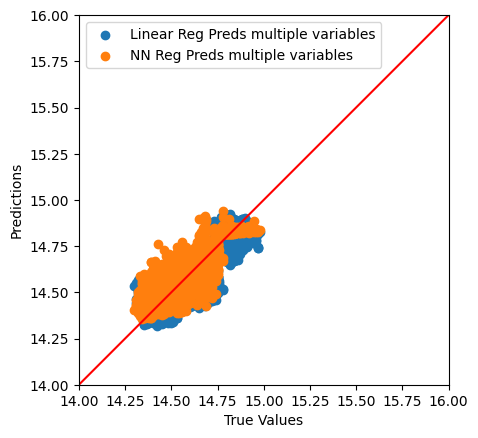

In [ ]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Linear Reg Preds multiple variables")
plt.scatter(y_test_all, y_pred_nn, label="NN Reg Preds multiple variables")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [14, 16]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_= plt.plot(lims, lims, c="red")


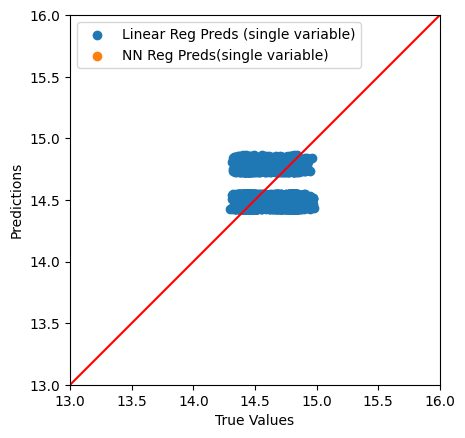

In [ ]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lrtemp, label="Linear Reg Preds (single variable)")
plt.scatter(y_test_all, y_pred_nntemp, label="NN Reg Preds(single variable)")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [13, 16]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_= plt.plot(lims, lims, c="red")

Use trained model to make predictions

In [ ]:
X_test_all


array([[ -10.81,  -97.69,    9.53],
       [ -10.84,  -99.12,    9.31],
       [ -10.7 , -100.17,    9.34],
       ...,
       [ -10.73, -100.15,    9.51],
       [ -10.74,  -95.61,    9.06],
       [ -10.81, -102.33,    9.05]])

In [ ]:
np.array(y_test_all)

array([[14.46],
       [14.6 ],
       [14.44],
       ...,
       [14.37],
       [14.46],
       [14.43]])

In [ ]:
all_reg.predict(X_test_all)

array([[14.5111604 ],
       [14.44179301],
       [14.51207791],
       ...,
       [14.51728645],
       [14.52251477],
       [14.37471032]])

In [ ]:
y_test_all

array([[14.46],
       [14.6 ],
       [14.44],
       ...,
       [14.37],
       [14.46],
       [14.43]])

In [ ]:
K Means predict for unsupervised learning

In [136]:
import seaborn as sns

In [184]:
df = df.drop(['Outcome'], axis=1)

KeyError: ignored

In [187]:
dataset_cols = ['Q_Factor','TX_Power','Chromatic_Dispersion','Polarization_Mode_Dispersion','Outcome']

In [192]:
len(dataset_cols)-1

4

In [177]:
#dataset_cols = dataset_cols[0:]


In [193]:
df['Class'] = np.where(df['Q_Factor'] > 14.5, '1','0')
#df["Outcome"].astype(int)
df['Class'] =df['Class'].astype(int)

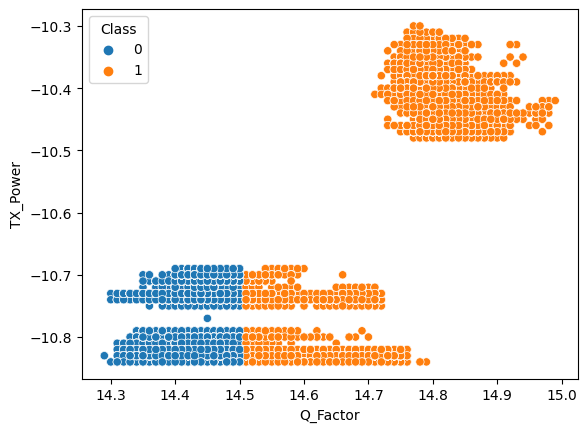

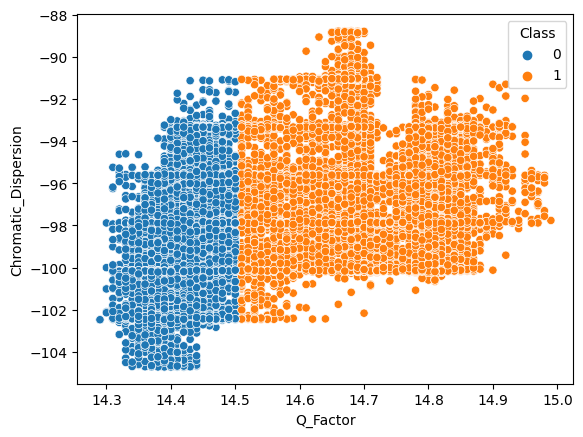

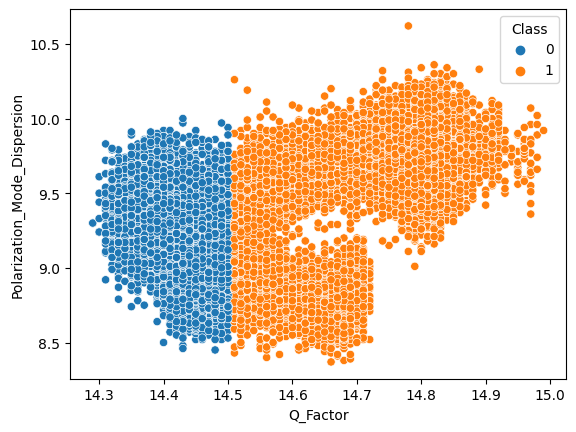

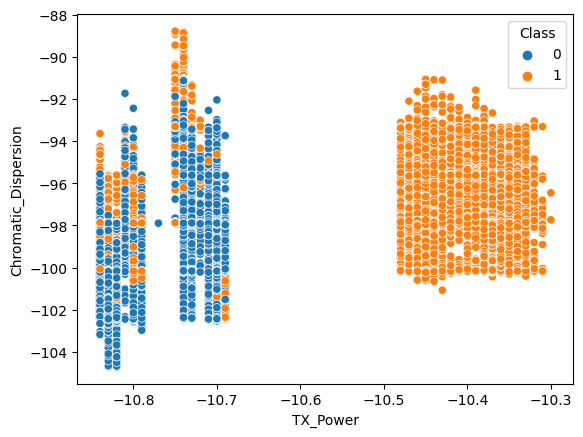

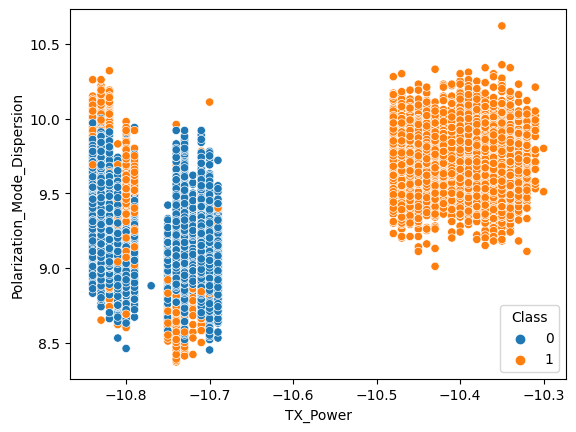

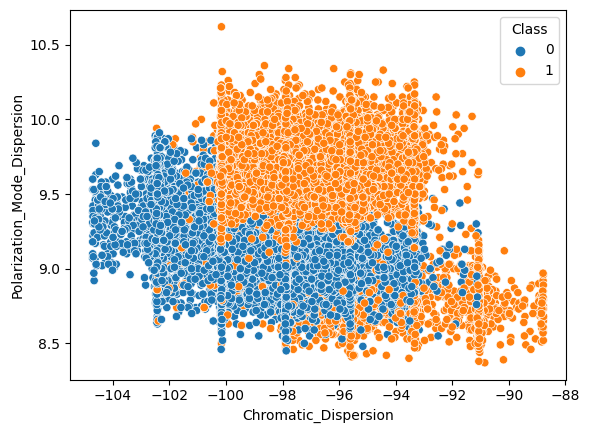

In [194]:
for i in range(len(dataset_cols)-1):
  for j in range(i+1, len(dataset_cols)-1):
    x_label = dataset_cols[i]
    y_label = dataset_cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue ='Class')
    plt.show()

In [195]:
#CLUSTERING
from sklearn.cluster import KMeans


In [224]:
x = "Chromatic_Dispersion"

In [225]:
y = "Polarization_Mode_Dispersion"

In [226]:
X = df[[x, y]].values

In [227]:
kmeans = KMeans(n_clusters =2).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [228]:
clusters = kmeans.labels_

In [205]:
clusters

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [229]:
df["Class"].values

array([1, 1, 1, ..., 1, 1, 1])

In [215]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns=[x, y, "Class"])

[]

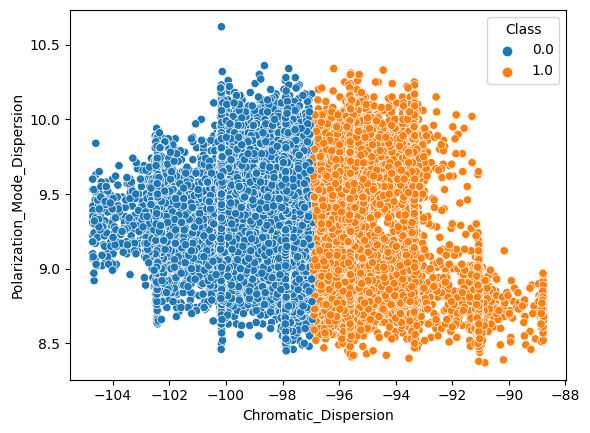

In [230]:
# K Means classes
sns.scatterplot(x=x, y= y, hue = 'Class', data=cluster_df)
plt.plot()

[]

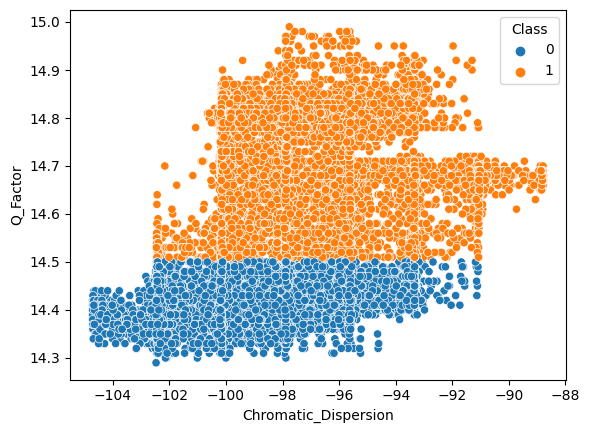

In [218]:
# Original data
sns.scatterplot(x=x, y= y, hue = 'Class', data=df)
plt.plot()

In [ ]:
#higher dimesion

In [231]:
X = df[dataset_cols[:-1]].values

In [236]:
kmeans = KMeans(n_clusters =2 ).fit(X)
#cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns=df.columns)
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1,1))), columns=df.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[]

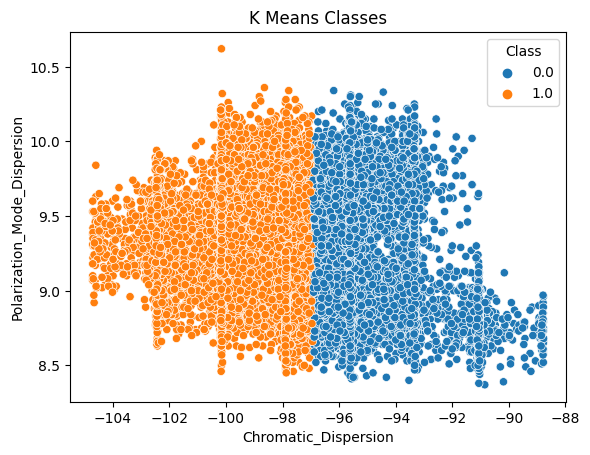

In [240]:
#k means classes
sns.scatterplot(x=x, y= y, hue = 'Class', data=cluster_df)
plt.title('K Means Classes')
plt.plot()

[]

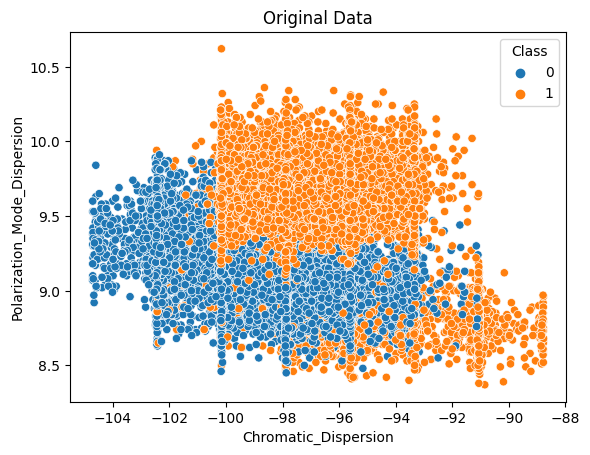

In [239]:
# Original data
sns.scatterplot(x=x, y= y, hue = 'Class', data=df)
plt.title('Original Data')
plt.plot()

PCA

In [ ]:
reducing dimension but mapping all dimensions into lower dimension number

In [241]:
from sklearn.decomposition import PCA

In [245]:
X

array([[ 14.72, -10.74, -91.06,   8.72],
       [ 14.72, -10.74, -91.06,   8.72],
       [ 14.7 , -10.74, -91.17,   8.76],
       ...,
       [ 14.8 , -10.38, -97.97,   9.71],
       [ 14.8 , -10.38, -97.88,   9.81],
       [ 14.82, -10.38, -98.19,   9.82]])

In [247]:
pca = PCA(n_components =2) #how many component want to map into
transformed_x = pca.fit_transform(X)


In [248]:
X.shape #number of samples and 4 features long

(32235, 4)

In [249]:
transformed_x.shape # length 2 (2 dimensions)

(32235, 2)

In [250]:
transformed_x[:5] # each sample 2 dimension points

array([[ 6.46926761, -0.61482766],
       [ 6.46926761, -0.61482766],
       [ 6.35851905, -0.5833028 ],
       [ 5.2231531 , -0.30451013],
       [ 3.43598213, -0.55532118]])

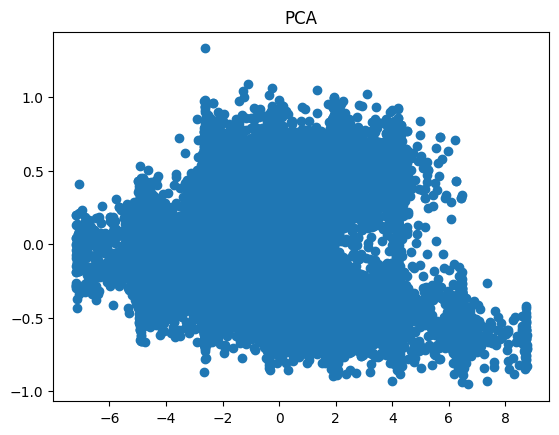

In [259]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.title("PCA")
plt.show() #taken 4 dimension to 2 dimesnion


In [254]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1,1))), columns=["pca1", "pca2","Class"])

In [255]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["Class"].values.reshape(-1,1))), columns=["pca1", "pca2","Class"])

[]

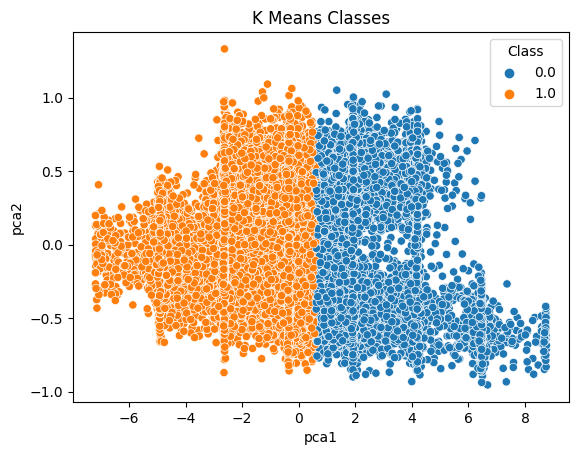

In [256]:
#k means classes
sns.scatterplot(x="pca1", y= "pca2", hue = 'Class', data=kmeans_pca_df)
plt.title('K Means Classes')
plt.plot()

[]

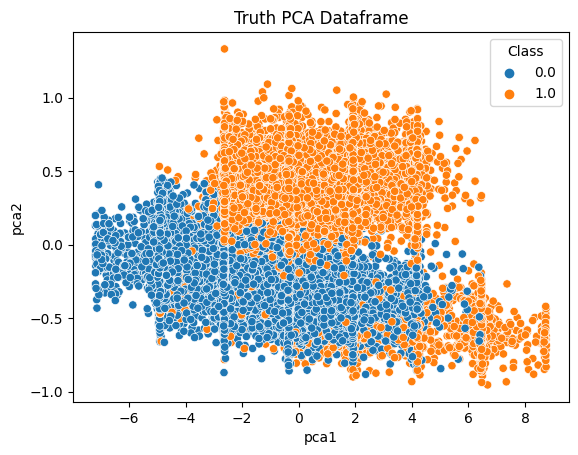

In [257]:
#Truth
sns.scatterplot(x="pca1", y= "pca2", hue = 'Class', data=truth_pca_df)
plt.title('Truth PCA Dataframe')
plt.plot()

Unsupervised struggle abit , can predict without any information

ANN model


In [260]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets

In [268]:
model = Sequential()
model.add(Dense(100,input_shape=(2,), activation="relu"))    #Number of nodes , activation function Relu used
model.add(Dense(1, activation='softmax'))

In [269]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [270]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               300       
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [271]:
from tensorflow.keras.optimizers.legacy import Adam

In [272]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_,X_train_all, y_train_all = get_xy(train, "Q_Factor", x_labels=df.columns[3:])
_, X_val_all, y_val_all = get_xy(val, "Q_Factor", x_labels=df.columns[3:])
_, X_test_all, y_test_all = get_xy(test, "Q_Factor", x_labels=df.columns[3:])

In [273]:
model.fit(X_train_all, y_train_all, epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


605/605 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 2/20
605/605 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 3/20
605/605 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 4/20
605/605 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 5/20
605/605 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 6/20
605/605 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 7/20
 60/605 [=>............................] - ETA: 1s - loss: 0.0000e+00 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test_all, y_test_all)

 37/202 [====>.........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


202/202 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [ ]:
pred=model.predict(X_test_all[:10])
print(pred)
print("Real values are ", y_test_all[:10])

1/1 [==============================] - 0s 17ms/step
[[0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [1.        ]
 [1.        ]]
Real values are  [[14.46]
 [14.6 ]
 [14.44]
 [14.49]
 [14.78]
 [14.44]
 [14.79]
 [14.38]
 [14.82]
 [14.43]]


Random Forest prediction

In [ ]:
model = tf.keras.layers.Sequential([tf.keras.layers.F])
all_normalizer.adapt(X_train_all)